In [104]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [105]:
w = 28
h = 28
k = 10
s = 300
learning_rate = 0.1
batch_size = 64
epochs = 20

In [106]:
def load_data(image_path, label_path, img_shape):
    with open(image_path, 'rb') as img_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, *img_shape)
    with open(label_path, 'rb') as lbl_file:
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

In [107]:
images_train, labels_train = load_data("./train-images.idx3-ubyte", "./train-labels.idx1-ubyte", (w, h))
images_test, labels_test = load_data("./t10k-images.idx3-ubyte", "./t10k-labels.idx1-ubyte", (w, h))
print("Train data shape: ", images_train.shape, ", Labels: ", labels_train.shape)
print("Test data shape: ", images_test.shape, ", Labels: ", labels_test.shape)

Train data shape:  (60000, 28, 28) , Labels:  (60000,)
Test data shape:  (10000, 28, 28) , Labels:  (10000,)


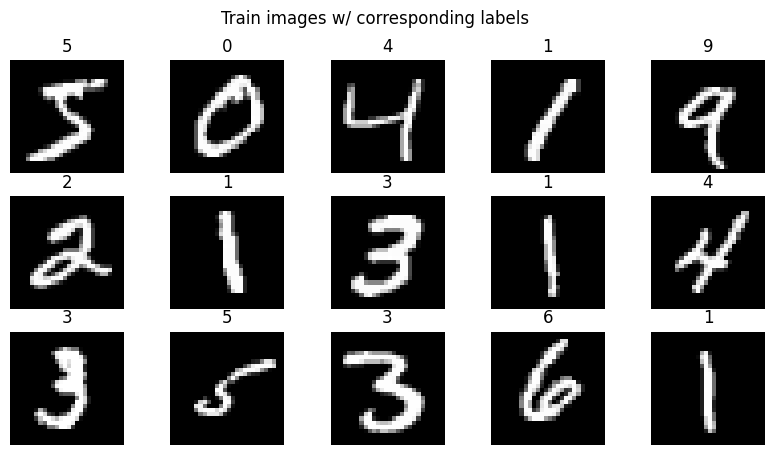

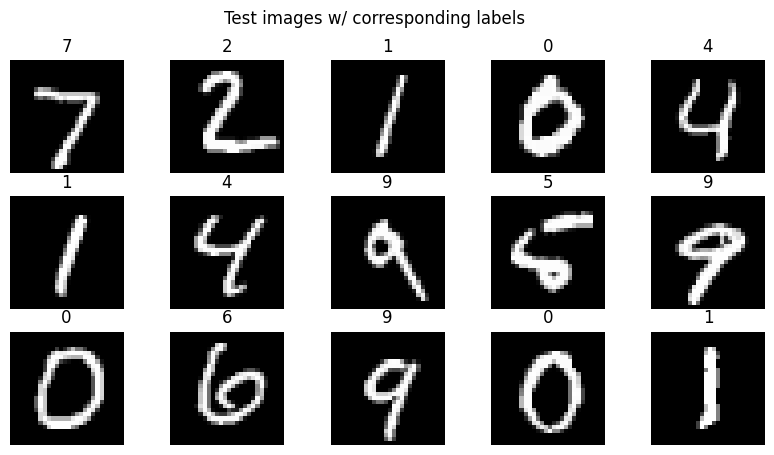

In [108]:
plt.figure(figsize=(10, 5))
plt.suptitle("Train images w/ corresponding labels")
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_train[i], cmap='gray')
    plt.title(labels_train[i])
    plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))
plt.suptitle("Test images w/ corresponding labels")
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_test[i], cmap='gray')
    plt.title(labels_test[i])
    plt.axis('off')

plt.show()

In [109]:
def relu(x):
  return np.maximum(x, 0)

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def cross_entropy(x, y):
  return np.mean(- 1 * y * np.log(x))

def accuracy(y, x):
  return np.mean(np.argmax(x, axis = 1) == np.argmax(y, axis = 1))

In [110]:
class NN():
  def __init__(self, input_dim, hidden_dim, output_dim, lr):
    self.weights1 = np.random.randn(input_dim, hidden_dim) * 0.02
    self.weights2 = np.random.randn(hidden_dim, output_dim) * 0.02
    self.bias1 = np.zeros((1, hidden_dim))
    self.bias2 = np.zeros((1, output_dim))
    self.lr = lr

  def forward_pass(self, inputs):
    self.layer1 = relu(np.dot(inputs, self.weights1) + self.bias1)
    self.output = softmax(np.dot(self.layer1, self.weights2) + self.bias2)
    return self.output

  def backward_pass(self, inputs, true_output):
    error_output = (self.output - true_output) / len(self.output)
    delta_w2 = np.dot(self.layer1.T, error_output)
    relu_derivative = (self.layer1 > 0).astype(float)
    error_hidden = np.dot(error_output, self.weights2.T) * relu_derivative
    delta_w1 = np.dot(inputs.T, error_hidden)

    delta_b2 = np.sum(error_output, axis=0, keepdims=True)
    delta_b1 = np.sum(error_hidden, axis=0, keepdims=True)

    self.weights2 -= self.lr * delta_w2
    self.weights1 -= self.lr * delta_w1
    self.bias2 -= self.lr * delta_b2
    self.bias1 -= self.lr * delta_b1


def train_model(nn, x_train, y_train, epochs, batch_size):
    start = time.time()
    for epoch in range(epochs):
        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            nn.forward_pass(batch_x)
            nn.backward_pass(batch_x, batch_y)

        accuracy_val = accuracy(nn.forward_pass(x_train), y_train)
        print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {accuracy_val:.3f}")
    print(f"Training completed in {(time.time() - start) / 60:.2f} minutes")

In [111]:
images_train = images_train.reshape(-1, w * h).astype('float32') / 255
imagesTest = images_test.reshape(-1, w * h).astype('float32') / 255

train_labels_onehot = np.eye(k)[labels_train]
test_labels_onehot = np.eye(k)[labels_test]

In [112]:
model = NN(w*h, s, k, learning_rate)
train_model(model, images_train, train_labels_onehot, epochs, batch_size)

print("Test data accuracy = {:.3f}".format(accuracy(test_labels_onehot, model.forward_pass(imagesTest))))

Epoch 1/20, Training Accuracy: 0.920
Epoch 2/20, Training Accuracy: 0.945
Epoch 3/20, Training Accuracy: 0.958
Epoch 4/20, Training Accuracy: 0.966
Epoch 5/20, Training Accuracy: 0.972
Epoch 6/20, Training Accuracy: 0.976
Epoch 7/20, Training Accuracy: 0.980
Epoch 8/20, Training Accuracy: 0.982
Epoch 9/20, Training Accuracy: 0.984
Epoch 10/20, Training Accuracy: 0.986
Epoch 11/20, Training Accuracy: 0.987
Epoch 12/20, Training Accuracy: 0.989
Epoch 13/20, Training Accuracy: 0.990
Epoch 14/20, Training Accuracy: 0.991
Epoch 15/20, Training Accuracy: 0.992
Epoch 16/20, Training Accuracy: 0.992
Epoch 17/20, Training Accuracy: 0.993
Epoch 18/20, Training Accuracy: 0.994
Epoch 19/20, Training Accuracy: 0.994
Epoch 20/20, Training Accuracy: 0.995
Training completed in 1.96 minutes
Test data accuracy = 0.980
